# House Price Prediction

In [1]:
# Simple Lineer Regression
# Multiple Lineer Regression
# Decision Tree Regression
# Random Forest Regression

Dataset contains:

Id: a notation for a house

Date: Date house was sold

Price: Price is prediction target

Bedrooms: Number of Bedrooms/House

Bathrooms: Number of bathrooms/House

Sqft_Living: square footage of the home

Sqft_Lot: square footage of the lot

Floors: Total floors (levels) in house

Waterfront: House which has a view to a waterfront

View: Has been viewed

Condition: How good the condition is ( Overall )

Grade: overall grade given to the housing unit, based on King County grading system

Sqft_Above: square footage of house apart from basement

Sqft_Basement: square footage of the basement

Yr_Built: Built Year

Yr_Renovated: Year when house was renovated

Zipcode: Zip

Lat: Latitude coordinate

Long: Longitude coordinate

Sqft_Living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

Sqft_Lot15: lotSize area in 2015(implies-- some renovations)

# Prepare Data

In [2]:
# Import The Necessary Packages

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = "kc_house_data.csv"
df = pd.read_csv(data)
df.head(10)

id             date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000   221900.0         3       1.00         1180   
1  6414100192  20141209T000000   538000.0         3       2.25         2570   
2  5631500400  20150225T000000   180000.0         2       1.00          770   
3  2487200875  20141209T000000   604000.0         4       3.00         1960   
4  1954400510  20150218T000000   510000.0         3       2.00         1680   
5  7237550310  20140512T000000  1225000.0         4       4.50         5420   
6  1321400060  20140627T000000   257500.0         3       2.25         1715   
7  2008000270  20150115T000000   291850.0         3       1.50         1060   
8  2414600126  20150415T000000   229500.0         3       1.00         1780   
9  3793500160  20150312T000000   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   
5    101930     1.0           0     0  ...     11        3890           1530   
6      6819     2.0           0     0  ...      7        1715              0   
7      9711     1.0           0     0  ...      7        1060              0   
8      7470     1.0           0     0  ...      7        1050            730   
9      6560     2.0           0     0  ...      7        1890              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   
5      2001             0    98053  47.6561 -122.005           4760   
6      1995             0    98003  47.3097 -122.327           2238   
7      1963             0    98198  47.4095 -122.315           1650   
8      1960             0    98146  47.5123 -122.337           1780   
9      2003             0    98038  47.3684 -122.031           2390   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  
5      101930  
6        6819  
7        9711  
8        8113  
9        7570  

[10 rows x 21 columns]

In [4]:
print("Data Shape: ", df.shape)

Data Shape:  (21613, 21)


###### Null Value Detection

Let's Check for null values in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

##### Finding Unique Values

From the above it is clear that the dataset have no null values present, so lets check how many unique values is present for each feature. We will loop through the dataset for checking the unique values present.

In [33]:
#Lets find out how many unique values are present in each column

for value in df:
    print('For {},{} unique values present'.format(value,df[value].nunique()))

For id,21436 unique values present
For date,372 unique values present
For price,4028 unique values present
For bedrooms,13 unique values present
For bathrooms,30 unique values present
For sqft_living,1038 unique values present
For sqft_lot,9782 unique values present
For floors,6 unique values present
For waterfront,2 unique values present
For view,5 unique values present
For condition,5 unique values present
For grade,12 unique values present
For sqft_above,946 unique values present
For sqft_basement,306 unique values present
For yr_built,116 unique values present
For yr_renovated,70 unique values present
For zipcode,70 unique values present
For lat,5034 unique values present
For long,752 unique values present
For sqft_living15,777 unique values present
For sqft_lot15,8689 unique values present


In [31]:
df.describe().T

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

## Data Visualization

<Figure size 1000x600 with 0 Axes>

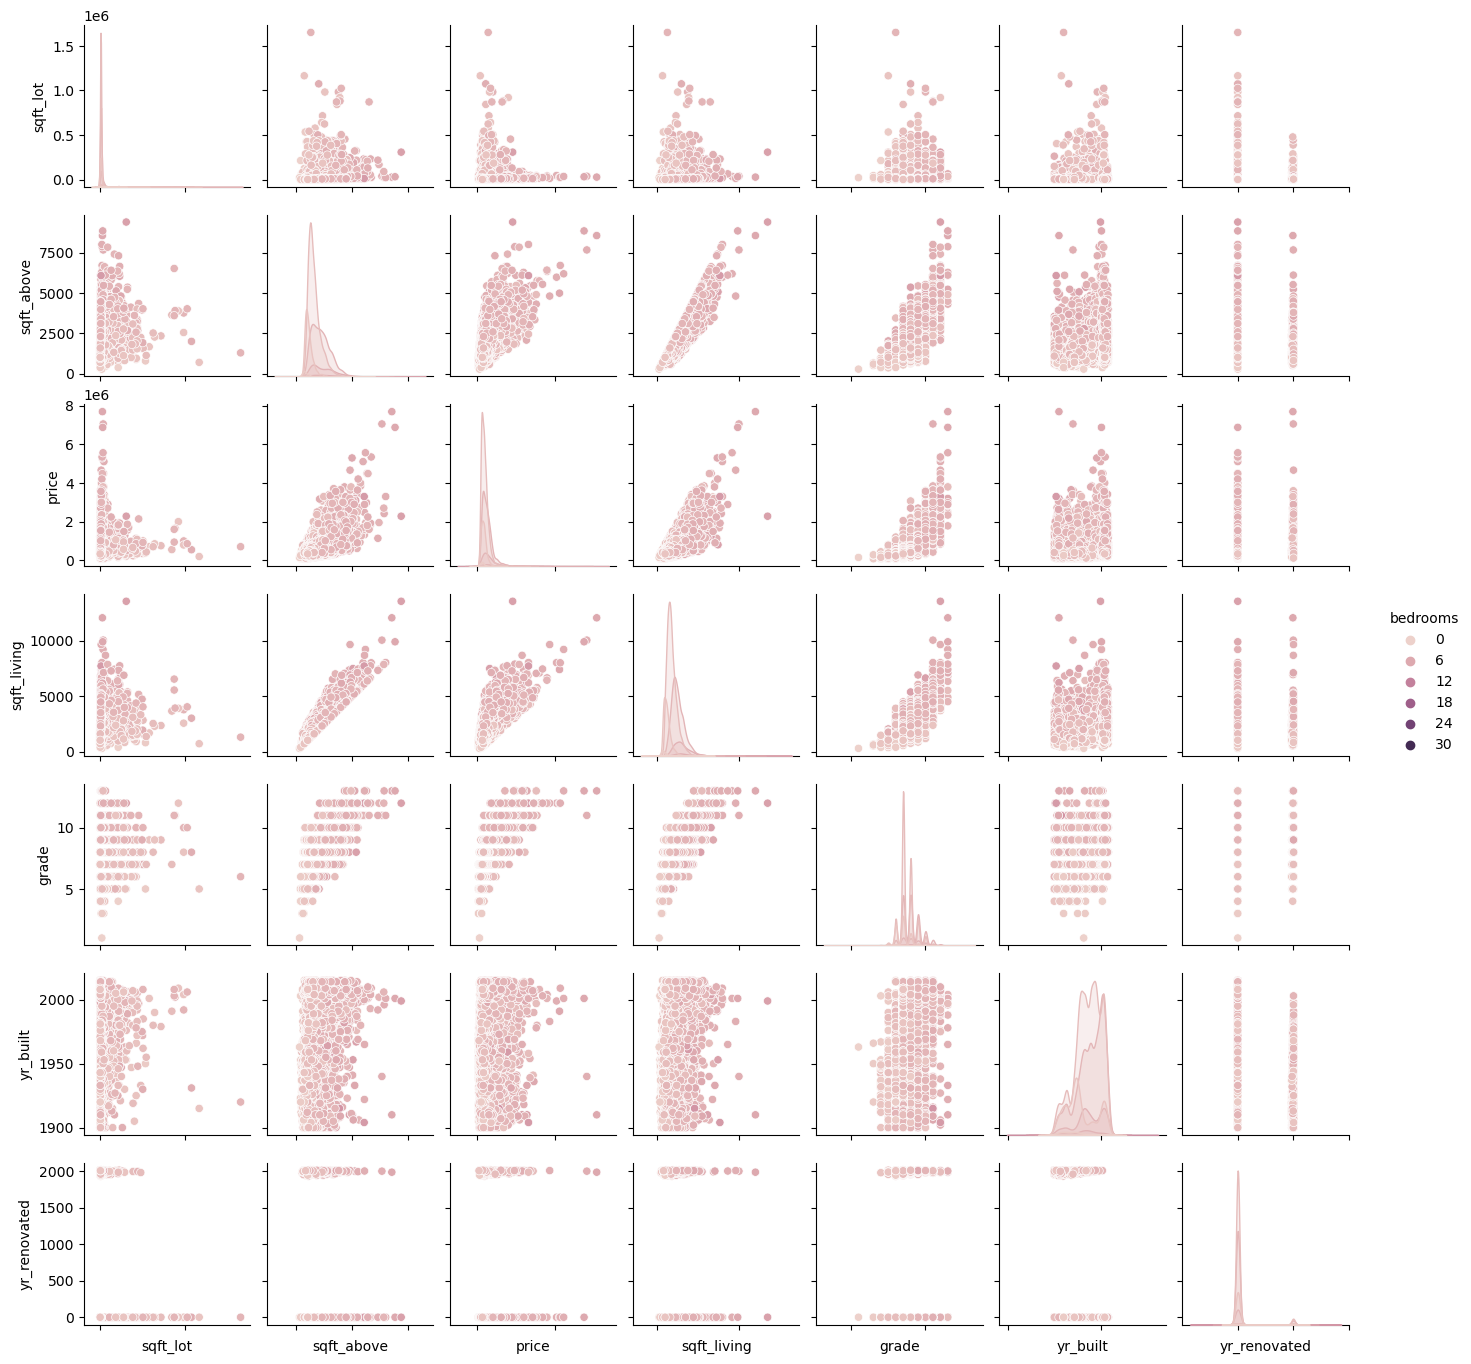

In [36]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']]
                 ,hue='bedrooms',size=2)
g.set(xticklabels=[])

From the above plot it is clear for a linear regression for sqft_living & price,

So lets plot them in a joint plot to explore more on the data.

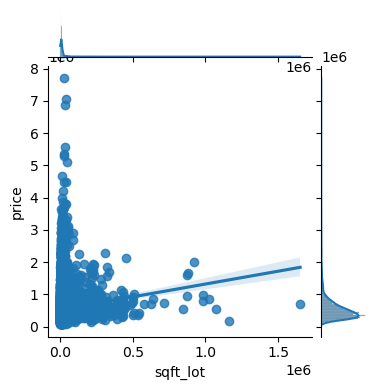

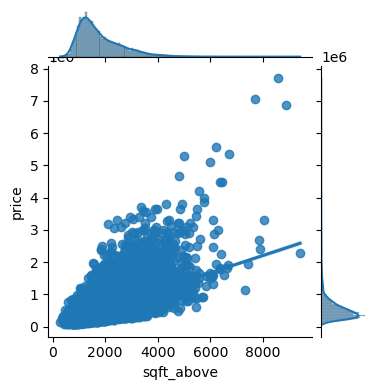

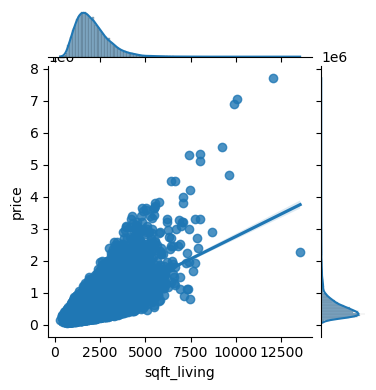

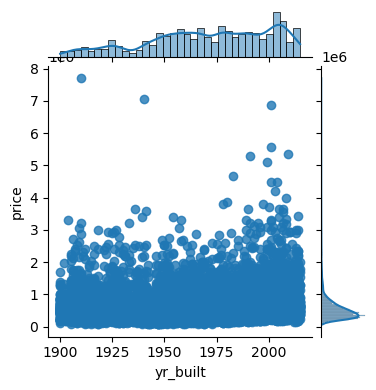

In [38]:
sns.jointplot(x='sqft_lot',y='price',data=df,kind='reg',size=4)
sns.jointplot(x='sqft_above',y='price',data=df,kind='reg',size=4)
sns.jointplot(x='sqft_living',y='price',data=df,kind='reg',size=4)
sns.jointplot(x='yr_built',y='price',data=df,kind='reg',size=4)

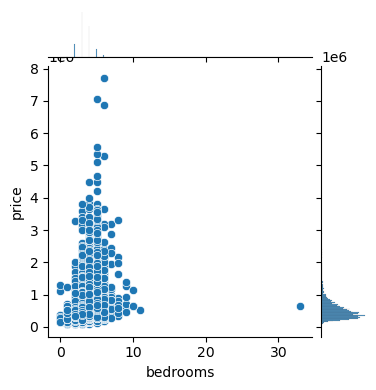

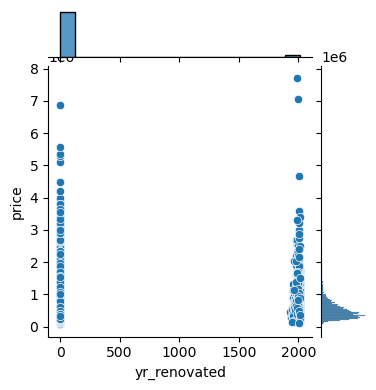

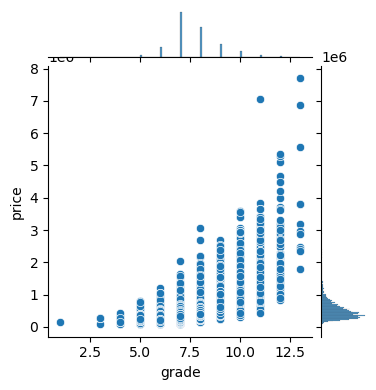

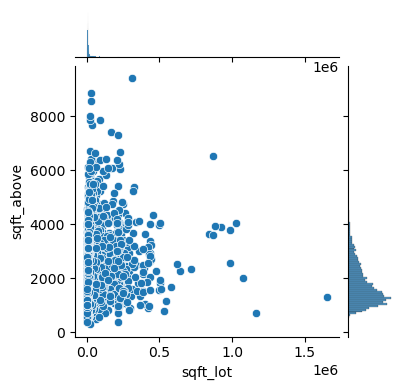

In [40]:
sns.jointplot(x='bedrooms',y='price',data=df,kind='scatter',size=4)
sns.jointplot(x='yr_renovated',y='price',data=df,kind='scatter',size=4)
sns.jointplot(x='grade',y='price',data=df,kind='scatter',size=4)
sns.jointplot(x='sqft_lot',y='sqft_above',data=df,kind='scatter',size=4)

In [8]:
hist1 = [go.Histogram(x=df.grade,marker=dict(color='rgb(102, 0, 102)'))]
histlayout1 = go.Layout(title="Grade Counts of Houses",xaxis=dict(title="Grades"),yaxis=dict(title="Counts"))
histfig1 = go.Figure(data=hist1,layout=histlayout1)
iplot(histfig1)

In [9]:
hist2 = [go.Histogram(x=df.yr_built,xbins=dict(start=np.min(df.yr_built),size=1,end=np.max(df.yr_built)),marker=dict(color='rgb(0,102,0)'))]

histlayout2 = go.Layout(title="Built Year Counts of Houses",xaxis=dict(title="Years"),yaxis=dict(title="Built Counts"))

histfig2 = go.Figure(data=hist2,layout=histlayout2)

iplot(histfig2)

In [10]:
v21 = [go.Box(y=df.bedrooms,name="Bedrooms",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
v22 = [go.Box(y=df.bathrooms,name="Bathrooms",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
v23 = [go.Box(y=df.floors,name="Floors",marker=dict(color="rgba(204,0,102,0.9)"),hoverinfo="name+y")]

layout2 = go.Layout(title="Bedrooms,Bathrooms and Floors",yaxis=dict(range=[0,13])) #I hate 33 bedroom

fig2 = go.Figure(data=v21+v22+v23,layout=layout2)
iplot(fig2)

Co relation between Variables

We wil use heatmap to view the co relation between variables

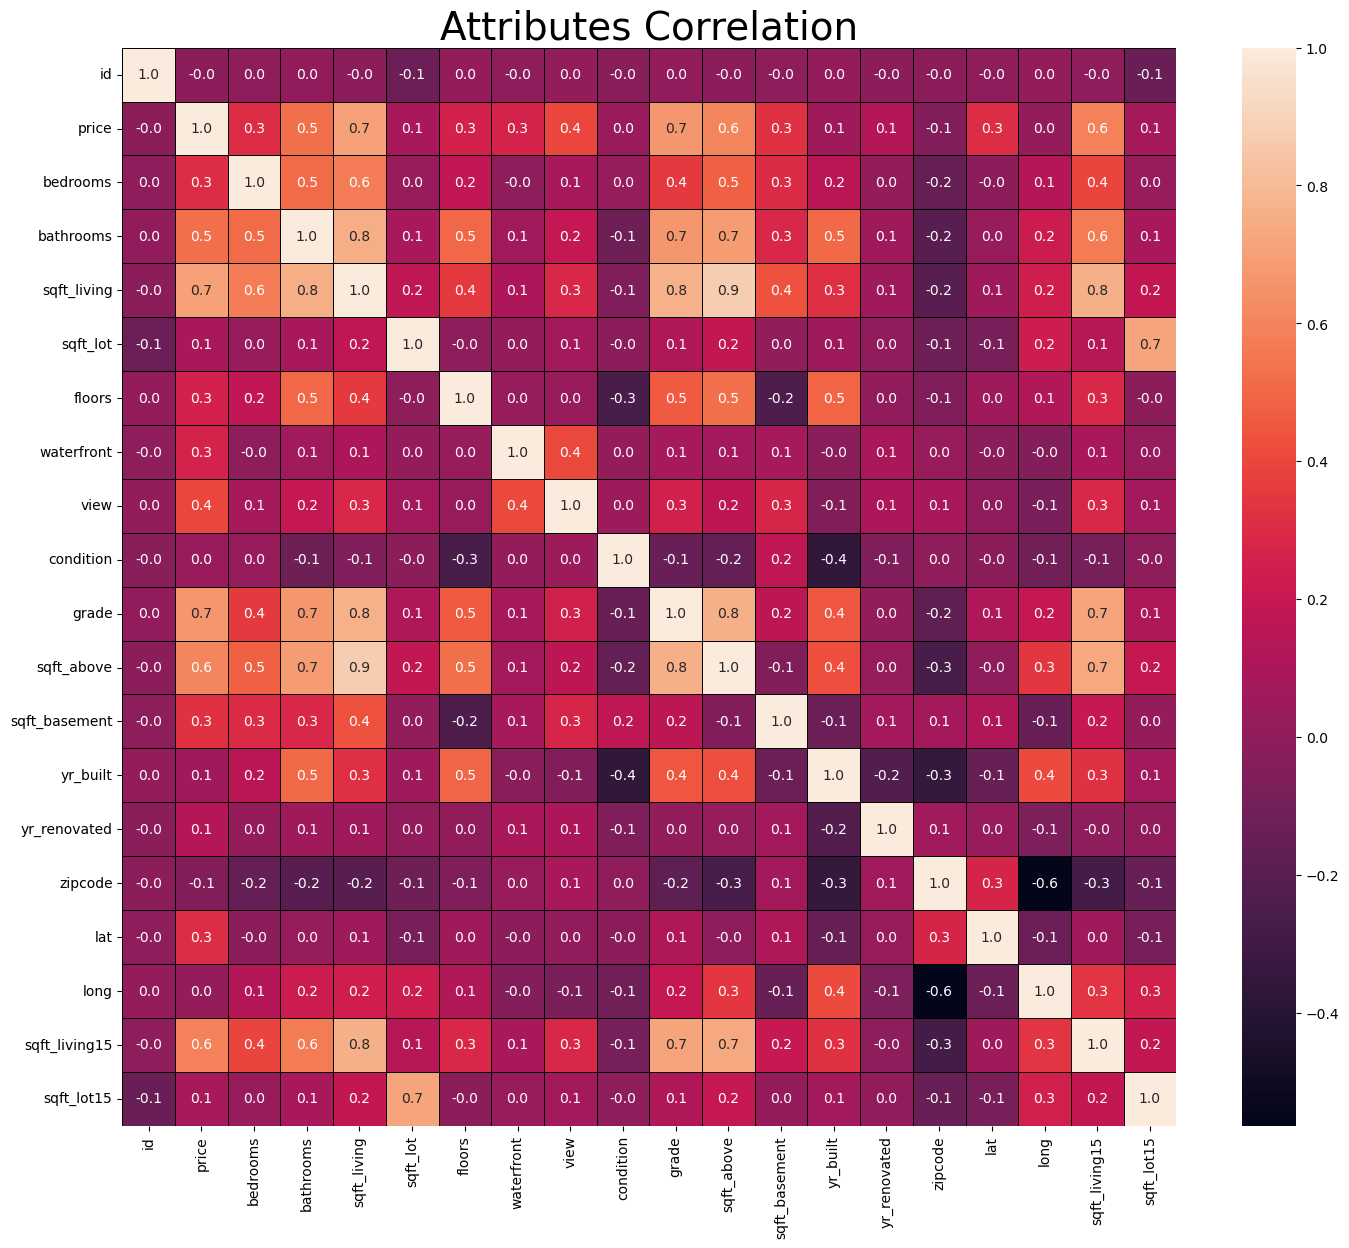

In [41]:
plt.subplots(figsize=(17,14))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="Black", fmt="1.1f")
plt.title("Attributes Correlation", fontsize=28)
plt.show()

In [11]:
import plotly.express as px

dataplus = df[np.logical_and(df.grade >= 7,df.yr_built >= 2000)] 
#list lat and long
lats = list(dataplus.lat.values)
longs = list(dataplus.long.values)

fig = px.scatter_mapbox(lat=lats, lon=longs, zoom=10, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [12]:
models_and_scores = []

# Simple Linear Regression

In [13]:
X = df[['sqft_living']].values
y = df.price.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)



In [16]:
model_score = lr.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print("Model Score            : ", model_score*100)
print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  49.406905389089005
R Square               :  49.406905389089005
Mean Squared Error     :  76484977061.77612
Root Mean Squared Error:  276559.1746114674
Median Absolute Error  :  128405.24396719533
Explained Variance     :  0.49413707666920037


# Multiple Linear Regression

In [17]:
new_df = df[['sqft_living15','lat','sqft_basement', 'sqft_above', 'grade','view','sqft_basement', 'sqft_living', 'bathrooms', 'floors', 'waterfront','yr_built']]
X = new_df.values
y = df.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [18]:
multi_lr_model = LinearRegression() # model

multi_lr_model.fit(X_train, y_train) # fit

y_pred = multi_lr_model.predict(X_test) # prediction

model_score = multi_lr_model.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)
models_and_scores.append(["Multiple Linear",r_square])

In [19]:
print("Model Score            : ", model_score*100)
print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  68.46839647422027
R Square               :  68.46839647422027
Mean Squared Error     :  47668441532.14086
Root Mean Squared Error:  218331.03657551957
Median Absolute Error  :  89135.35736158863
Explained Variance     :  0.684754202205098


# Decision Tree Regression

In [20]:
new_df = df[['sqft_living15','lat','sqft_basement', 'sqft_above', 'grade','view','sqft_basement', 'sqft_living', 'bathrooms', 'floors', 'waterfront','yr_built']]
X = new_df.values
y = df.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

model_score = dtr.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)


In [22]:
print("Model Score            : ", model_score*100)
print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  61.444865613712395
R Square               :  61.444865613712395
Mean Squared Error     :  58286384571.40238
Root Mean Squared Error:  241425.73303482457
Median Absolute Error  :  65000.0
Explained Variance     :  0.6144496659919753


In [23]:
# Model Tuning
param_grid = {
    'max_depth': list(np.arange(1,30)),
    'min_samples_split': list(np.arange(1,10))
}

dtr_model = DecisionTreeRegressor(random_state=42)
dtr_cv_model = GridSearchCV(dtr_model, param_grid, cv=10, n_jobs=-1, verbose=2)
dtr_cv_model.fit(X_train, y_train)
print("Best Params: ", dtr_cv_model.best_params_)
print("Best Score : ", dtr_cv_model.best_score_)

y_pred = dtr_cv_model.predict(X_test)

r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)
models_and_scores.append(['Decision Tree', dtr_cv_model.best_score_])

print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Fitting 10 folds for each of 261 candidates, totalling 2610 fits
Best Params:  {'max_depth': 9, 'min_samples_split': 9}
Best Score :  0.7535202028362169
R Square               :  71.68950816761419
Mean Squared Error     :  42798870775.94677
Root Mean Squared Error:  206878.87948252904
Median Absolute Error  :  58504.88421052636
Explained Variance     :  0.7169089564150837


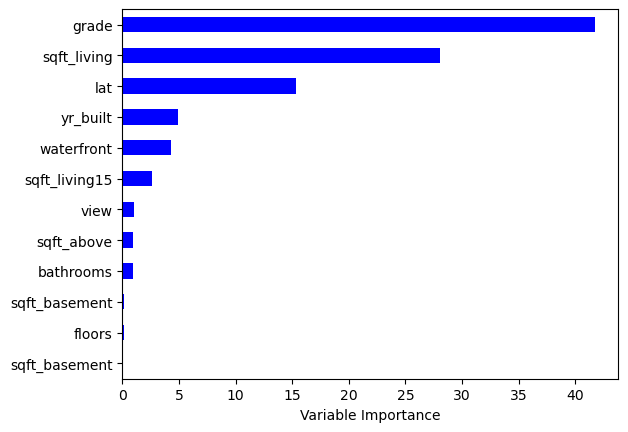

In [24]:
columns = ['sqft_living15','lat','sqft_basement', 'sqft_above', 'grade','view','sqft_basement', 'sqft_living', 'bathrooms', 'floors', 'waterfront','yr_built']

Importance = pd.DataFrame({
    'Importance': dtr_cv_model.best_estimator_.feature_importances_*100}, index=columns)
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="b")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

# Random Forest Regression

In [25]:
new_df = df[['sqft_living15','lat','sqft_basement', 'sqft_above', 'grade','view','sqft_basement', 'sqft_living', 'bathrooms', 'floors', 'waterfront','yr_built']]
X = new_df.values
y = df.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

model_score = rfr.score(X_test,y_test)
r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)

print("Model Score            : ", model_score*100)
print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Model Score            :  79.44327678962289
R Square               :  79.44327678962289
Mean Squared Error     :  31076978297.190254
Root Mean Squared Error:  176286.63675159912
Median Absolute Error  :  46714.42000000001
Explained Variance     :  0.7944537094661736


In [27]:
# Model Tuning
param_grid = {
    'max_depth': [1,5,10,30,50,100]
}

rfr_model = RandomForestRegressor(random_state=42)
rfr_cv_model = GridSearchCV(rfr_model, param_grid, cv=10, n_jobs=-1, verbose=2)
rfr_cv_model.fit(X_train, y_train)
print("Best Params: ", rfr_cv_model.best_params_)
print("Best Score : ", rfr_cv_model.best_score_)

y_pred = rfr_cv_model.predict(X_test)

r_square = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.median_absolute_error(y_test, y_pred)
ev = metrics.explained_variance_score(y_test, y_pred)
models_and_scores.append(['Random Forest', rfr_cv_model.best_score_])


print("R Square               : ", r_square*100)
print("Mean Squared Error     : ", mse)
print("Root Mean Squared Error: ", mse**(1/2))
print("Median Absolute Error  : ", mae)
print("Explained Variance     : ", ev)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best Params:  {'max_depth': 30}
Best Score :  0.8330773835090012
R Square               :  79.39007651010013
Mean Squared Error     :  31157404730.68423
Root Mean Squared Error:  176514.6020324784
Median Absolute Error  :  46530.01000000001
Explained Variance     :  0.79392077891733


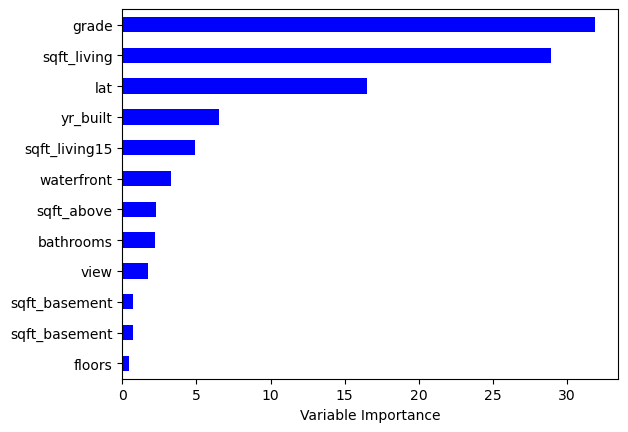

In [28]:
columns = ['sqft_living15','lat','sqft_basement', 'sqft_above', 'grade','view','sqft_basement', 'sqft_living', 'bathrooms', 'floors', 'waterfront','yr_built']

Importance = pd.DataFrame({
    'Importance': rfr_cv_model.best_estimator_.feature_importances_*100}, index=columns)
Importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="b")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None

# And Finally - Comparison

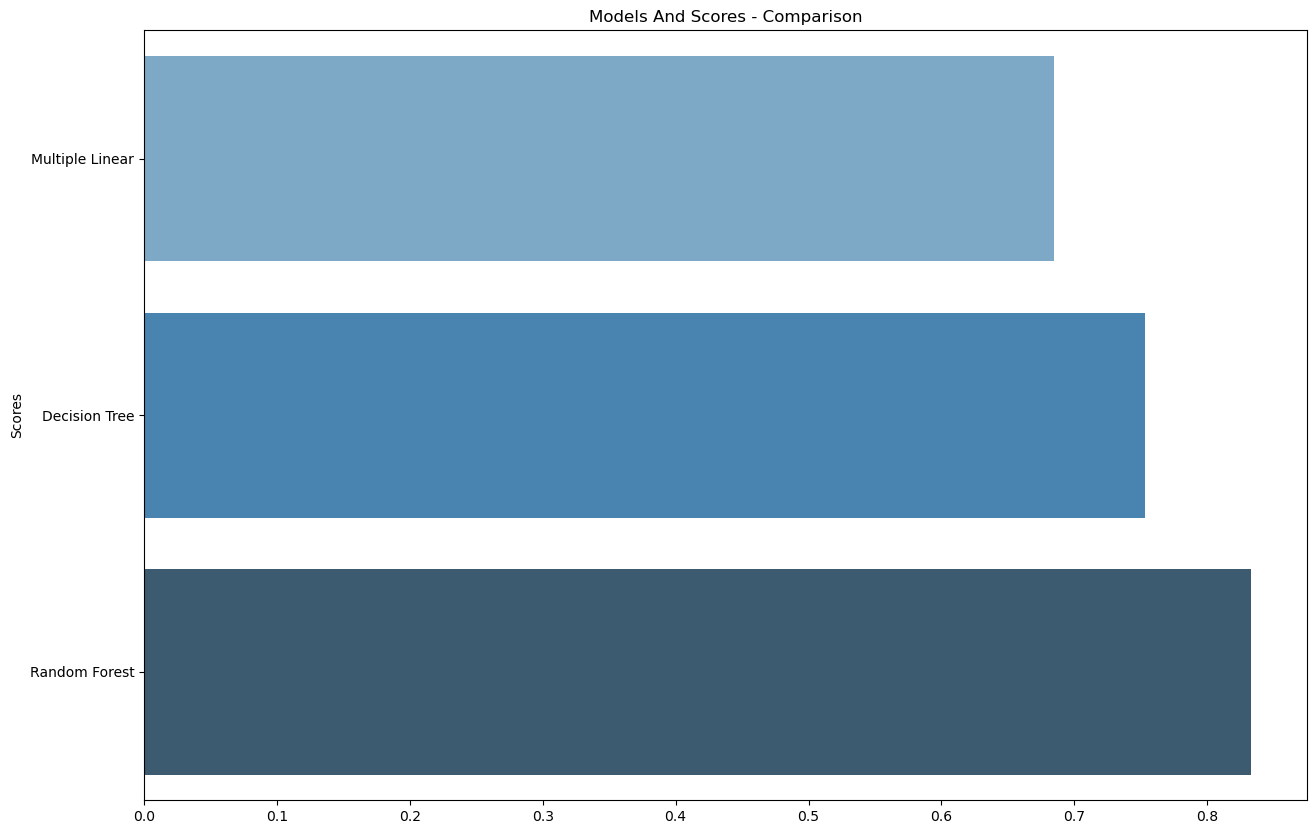

In [29]:
models, scores = [], []

for x in models_and_scores:
    models.append(x[0])
    scores.append(x[1])

plt.figure(figsize=(15,10))
ax = sns.barplot(x=scores, y=models, palette="Blues_d")
ax.set_title("Models And Scores - Comparison")
ax.set_ylabel("Models")
ax.set_ylabel("Scores")
plt.show()

### We can see that random forest algorithm is providing us a much better accracy and model score compared to multiple linear regresson and decision tree algorithm